In [1]:
from keras.datasets import imdb

In [2]:
import tensorflow as tf

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
arr = train_data == 285

In [6]:
for a in arr:
    if a == 'True':
        count = 1
    else:
        count = 0

In [7]:
count

0

In [8]:
train_labels[0]

1

In [9]:
len(train_data)

25000

In [10]:
len(train_data[0])

218

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
word_index = imdb.get_word_index()

In [13]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [14]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
import numpy as np

In [17]:
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) : 
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [18]:
len(x_train)

25000

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')

In [21]:
y_test = np.asarray(test_labels).astype('float32')

In [22]:
from keras import models

In [23]:
from keras import layers

In [24]:
model = models.Sequential()

In [25]:
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))

In [26]:
model.add(layers.Dense(16, activation = 'relu'))

In [27]:
model.add(layers.Dense(1, activation = 'sigmoid'))

In [28]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [29]:
from keras import optimizers

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [30]:
from keras import losses 
from keras import metrics

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [32]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [34]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5431 - acc: 0.7679 - val_loss: 0.4158 - val_acc: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3305 - acc: 0.9009 - val_loss: 0.3169 - val_acc: 0.8893
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2390 - acc: 0.9255 - val_loss: 0.2816 - val_acc: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1871 - acc: 0.9421 - val_loss: 0.2864 - val_acc: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1520 - acc: 0.9526 - val_loss: 0.2760 - val_acc: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1234 - acc: 0.9621 - val_loss: 0.2921 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1028 - acc: 0.9697 - val_loss: 0.3061 - val_acc: 0.8847
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0844 - a

In [35]:
history_dict = history.history

In [36]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

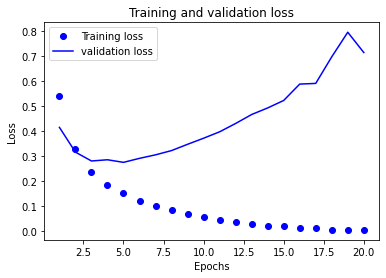

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_value, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

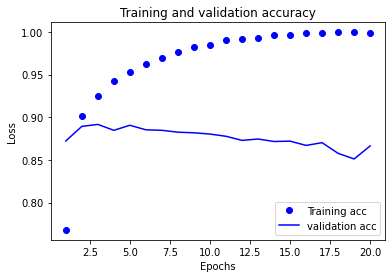

In [38]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4504 - accuracy: 0.8252
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2584 - accuracy: 0.9120
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1993 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3045 - accuracy: 0.8805


In [40]:
results

[0.3045017719268799, 0.8804799914360046]

In [42]:
y_pred = model.predict(x_test)

In [48]:
y_pred

array([[0.1631    ],
       [0.9998915 ],
       [0.8692279 ],
       ...,
       [0.0720076 ],
       [0.06110883],
       [0.5377388 ]], dtype=float32)

In [45]:
y_pred_value = y_pred.copy()

In [46]:
for i in range(y_pred.shape[0]):
    if y_pred[i] > 0.5:
        y_pred_value[i] = 1
    else:
        y_pred_value[i] = 0

In [47]:
y_pred_value

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)